# Advanced Exercise 3
## Taxi dataset

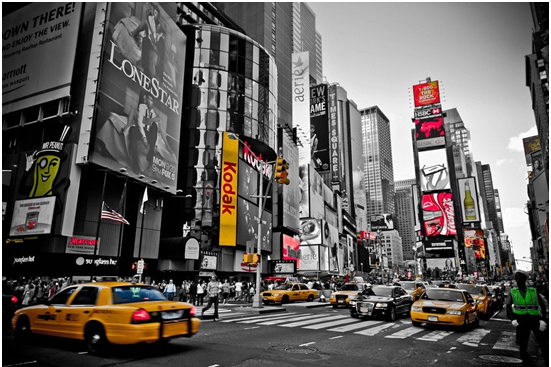

<li><b>3. Use the "taxis" dataset from the seaborn datasets
(sns.load_dataset('taxis')).</b> Find out any correlations or interesting
behaviors based on any columns in the data (color, payment,
pickup_borough, dropoff_borough etc.)
<br /><br />

<b>Notes and ideas to try out:</b><br />
Consider removing the pickup_zone and dropoff_zone, since there are
way too many alternatives. Borough is the larger area in question, which
can be helpful while grouping data (hue!)<br /><br />
How about pickup and dropoff times, should they be modified? From
taxi point of view, is the weekday and time of day (morning, day,
evening, night) more interesting than the actual dates?
<br /><br />
These are just ideas, you're free to come up with your own ideas
regarding the data!</li>
<br />

---

### My objective: To find out where taxis are getting the most tips and make the most money!

---

In [60]:
# Loading and Imports

import numpy as np
import pandas as pd
import seaborn as sns

df = sns.load_dataset('taxis')
df = df.sample(2000)

def create_datetime_group(row):
    
    time_hour = row.hour
    
    if 0 < time_hour <= 5:
        return 'early_morning'
    elif  5 < time_hour <= 10:
        return 'morning'    
    elif 10 < time_hour <= 15:
        return 'afternoon'
    else: 
        return 'evening'

df['pickup_time_day'] = df['pickup'].apply(create_datetime_group)
df['dropoff_time_day'] = df['dropoff'].apply(create_datetime_group)
df.head(5)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_time_day,dropoff_time_day
2762,2019-03-31 11:51:20,2019-03-31 12:14:16,0,6.60,23.0,6.55,0.0,32.85,yellow,credit card,Financial District North,Upper East Side South,Manhattan,Manhattan,afternoon,afternoon
2804,2019-03-19 16:53:04,2019-03-19 16:56:52,1,0.94,5.0,1.86,0.0,11.16,yellow,credit card,Upper East Side South,Lincoln Square East,Manhattan,Manhattan,evening,evening
5514,2019-03-31 13:40:06,2019-03-31 13:56:14,1,4.00,15.5,4.08,0.0,20.38,green,credit card,Downtown Brooklyn/MetroTech,Williamsburg (North Side),Brooklyn,Brooklyn,afternoon,afternoon
5295,2019-03-16 20:53:04,2019-03-16 21:00:59,1,1.30,7.0,1.00,0.0,11.80,yellow,credit card,Upper West Side South,Lincoln Square West,Manhattan,Manhattan,evening,evening
1054,2019-03-29 17:47:06,2019-03-29 17:48:38,5,0.40,3.5,0.00,0.0,7.80,yellow,cash,Greenwich Village South,West Village,Manhattan,Manhattan,evening,evening


In [61]:
# Checking to see how many NaN values there are.
df.isna().sum()

# No issues here.

pickup               0
dropoff              0
passengers           0
distance             0
fare                 0
tip                  0
tolls                0
total                0
color                0
payment             11
pickup_zone         11
dropoff_zone        18
pickup_borough      11
dropoff_borough     18
pickup_time_day      0
dropoff_time_day     0
dtype: int64

In [62]:
# Let's divide the times between morning, afternoon, evening, after_midnight

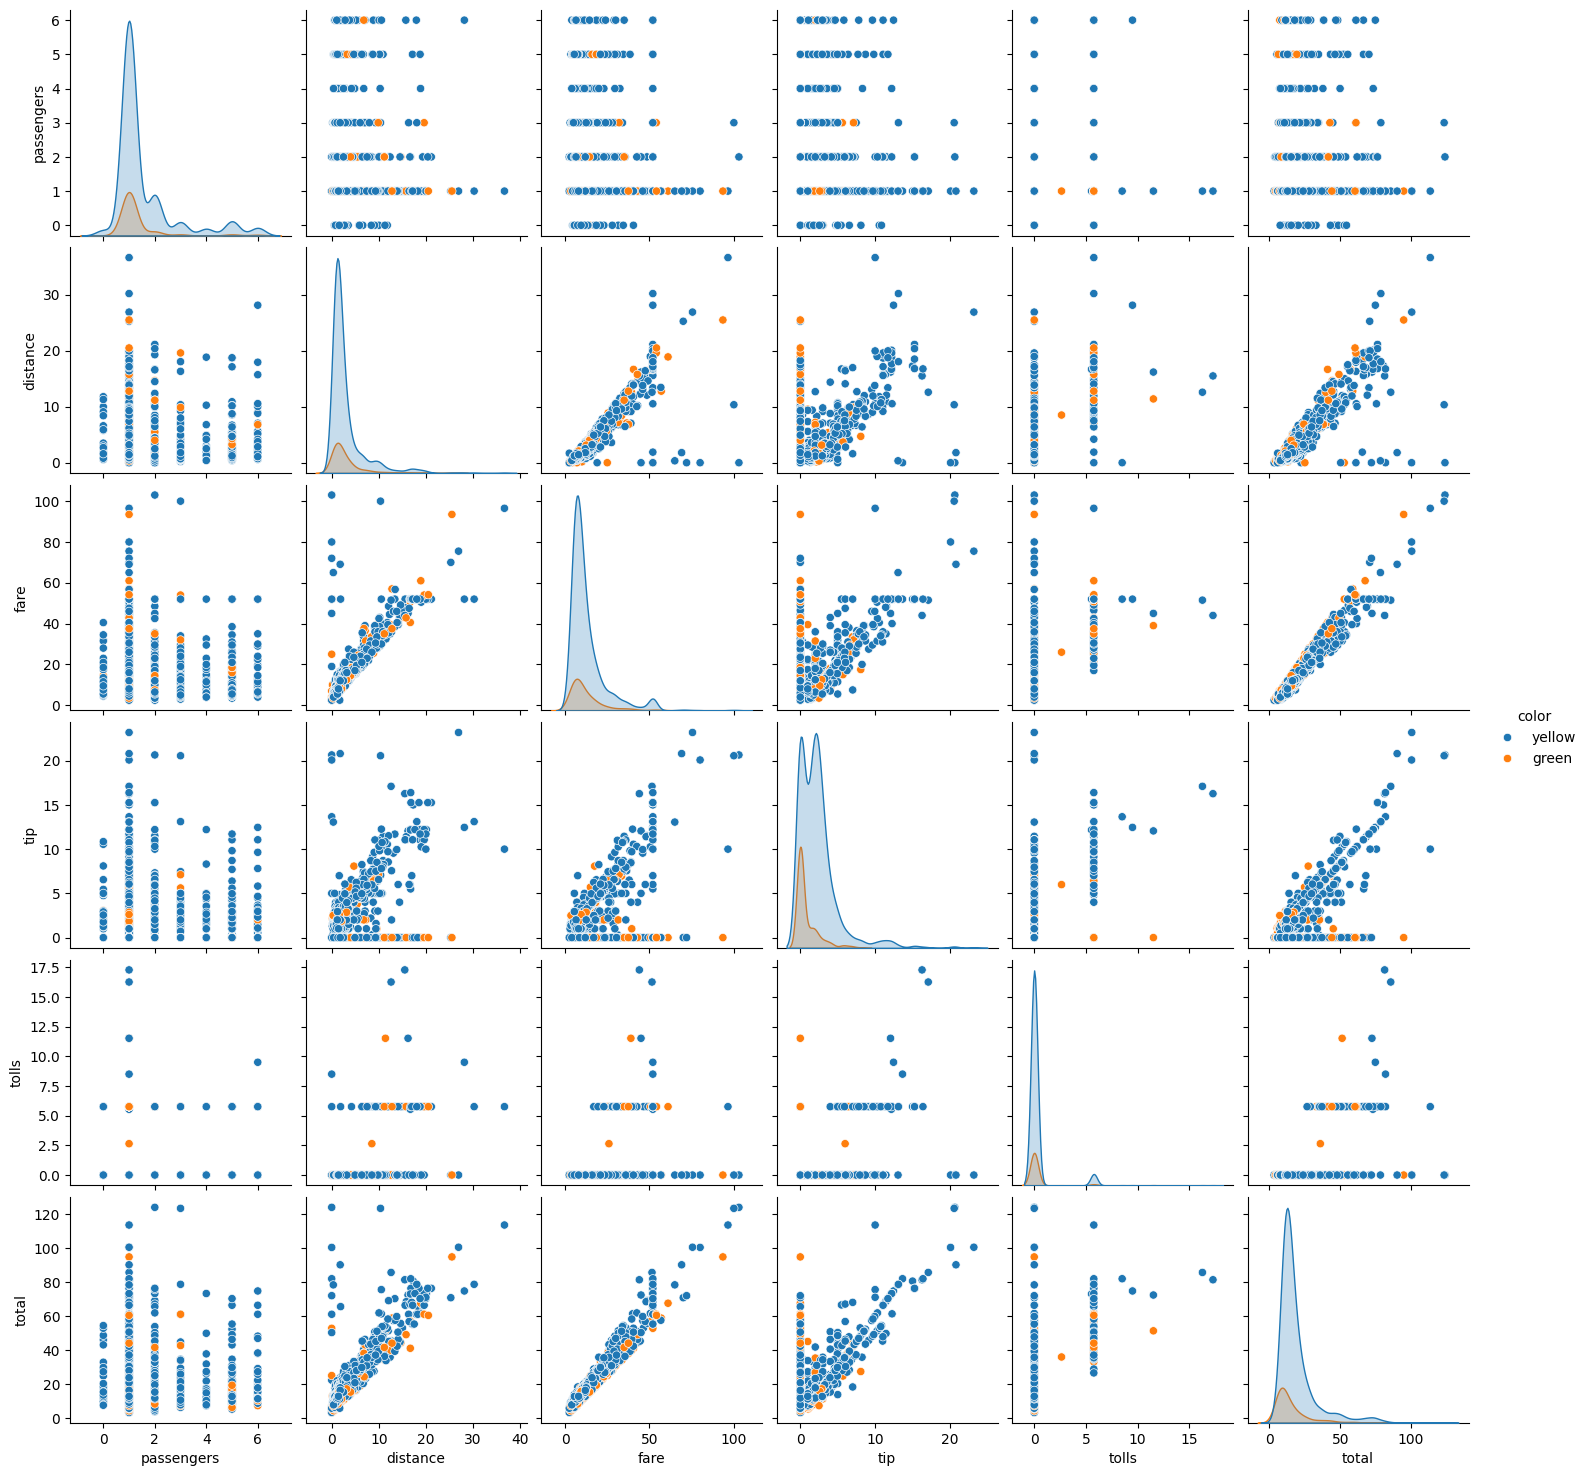

In [63]:
sns.pairplot(hue='color', data=df)

# Observations:
# It appears that yellow taxis often don't get tipped.
# It also appears that green taxis seem can go farther distances than yellow ones.

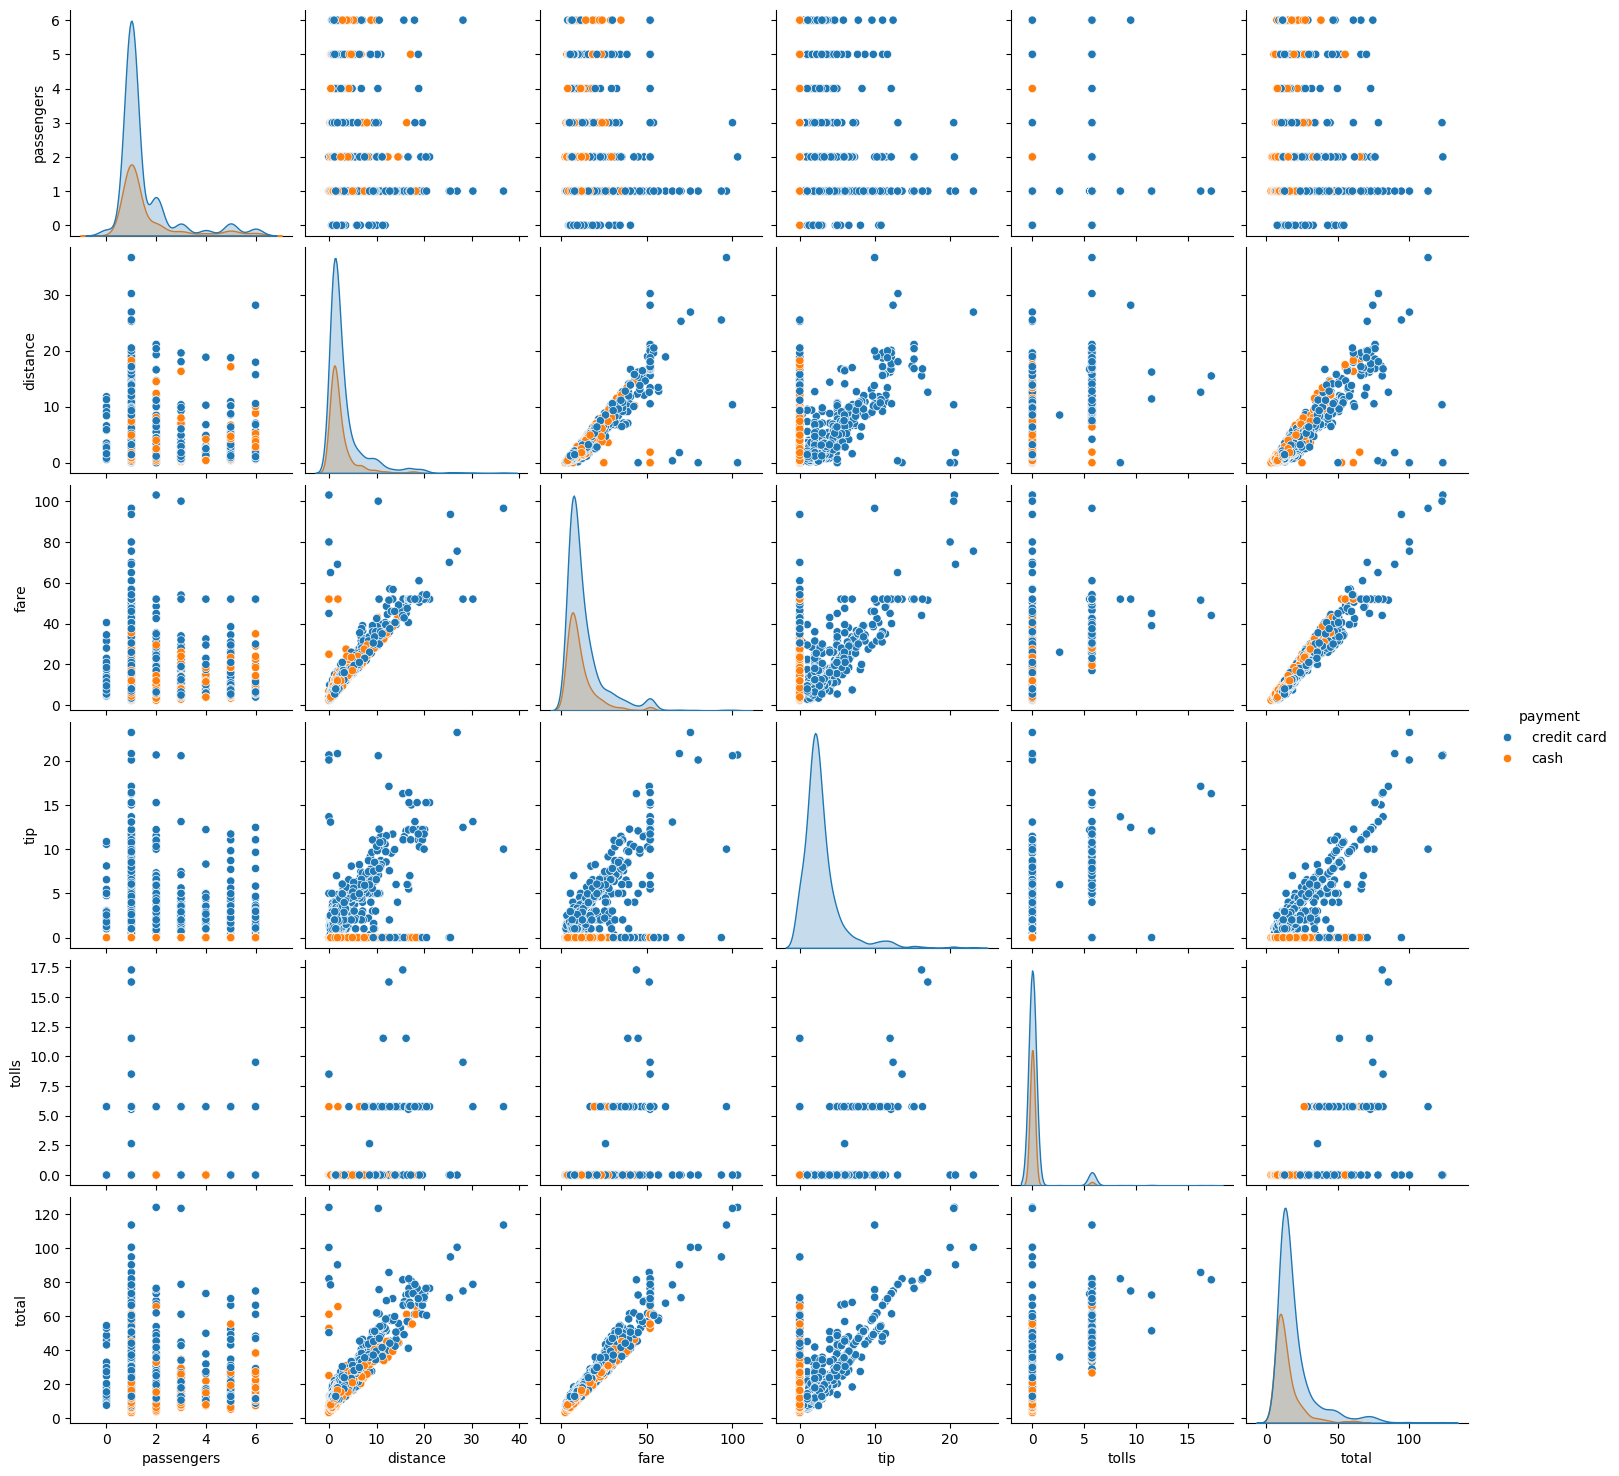

In [64]:
sns.pairplot(data=df,hue='payment')

# Observations:
# People mostly pay by card. It also appears that people 
# Who pay with cash, tip less. 


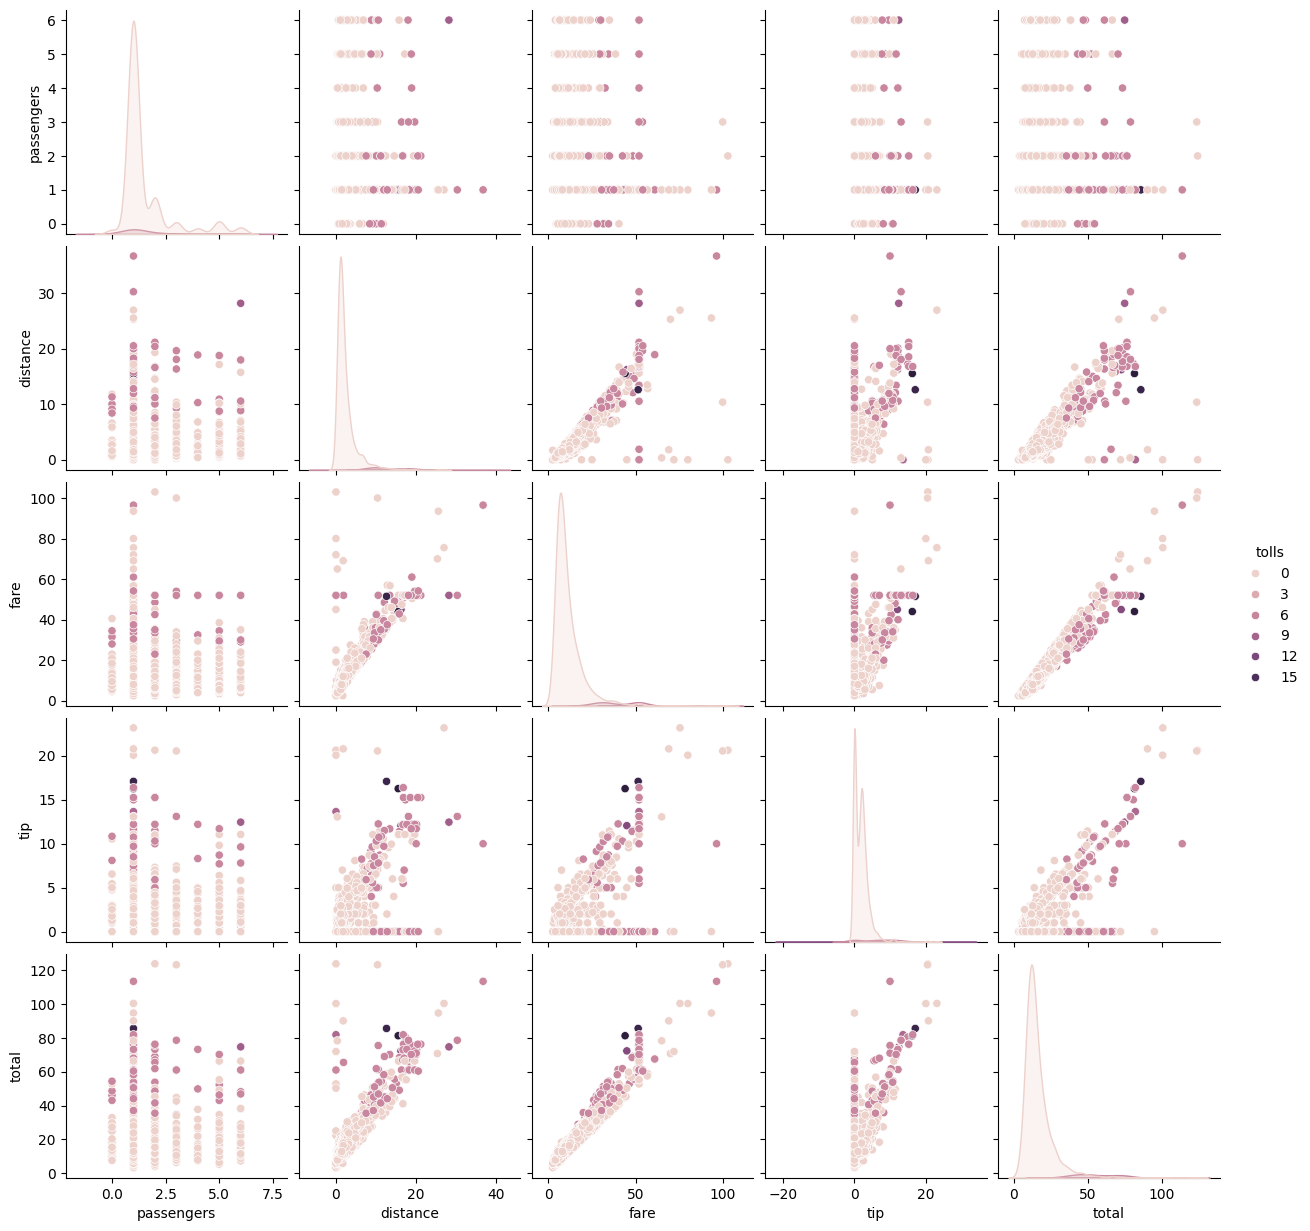

In [65]:
# We saw some outliers in the previous data, let's get rid of those.
df = df[df['tolls'] < 20]

# Let's get rid of some outliers that skew the data.
sns.pairplot(data=df,hue='tolls')



<Axes: >

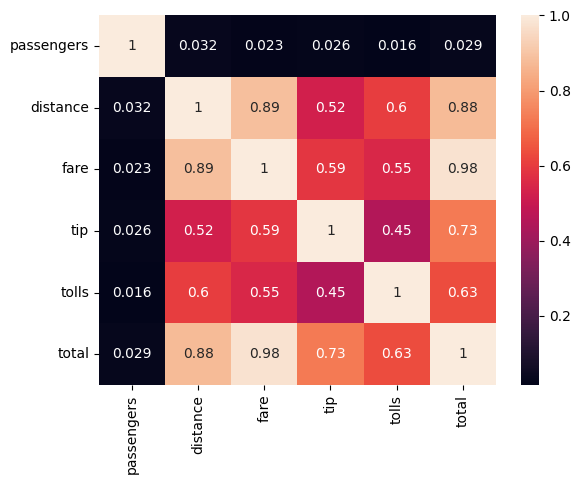

In [66]:
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True)

# Tips have a positive linear correlation with distance.
# Tolls also have a positive correlation with distance (Possibly
# because tolls suggest being on the freeway, which implies distance.)

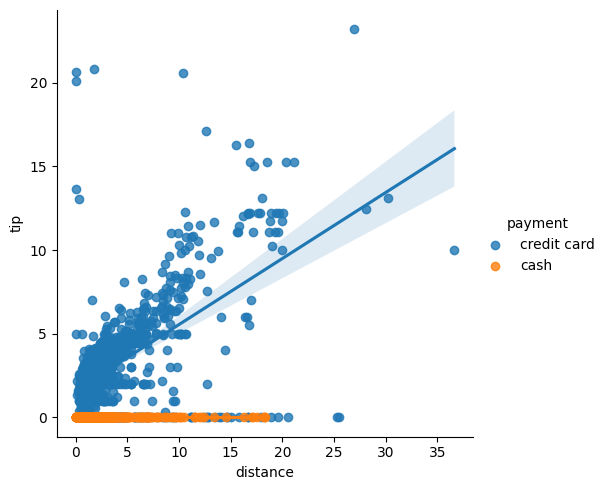

In [67]:
sns.lmplot(data=df, x='distance', y='tip', hue='payment')

# Distance traveled is commonly 1-5 miles, and the tip is typically 0-5 USD.
# The trendline clearly shows that cash-payers do not tip. 

In [68]:
# There is an overwhelmingly skewed distribution for passengers.
# Most trips are a single passenger. 
df['passengers'].value_counts()

passengers
1    1463
2     250
5      87
3      82
6      48
4      39
0      31
Name: count, dtype: int64

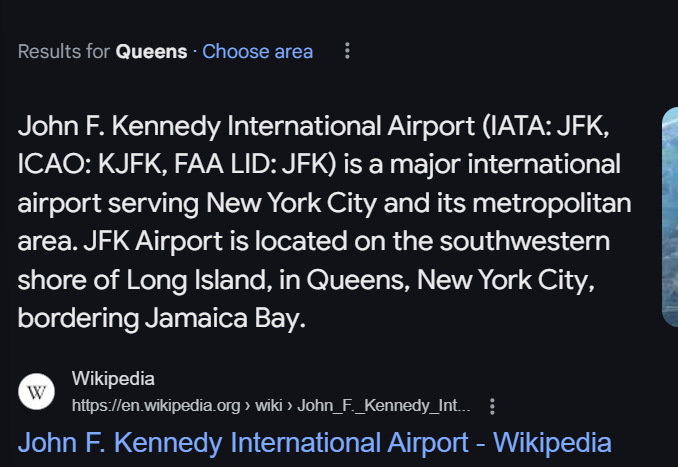

taken from a google search 'largest airport near Queens'

<Axes: xlabel='pickup_borough', ylabel='tip'>

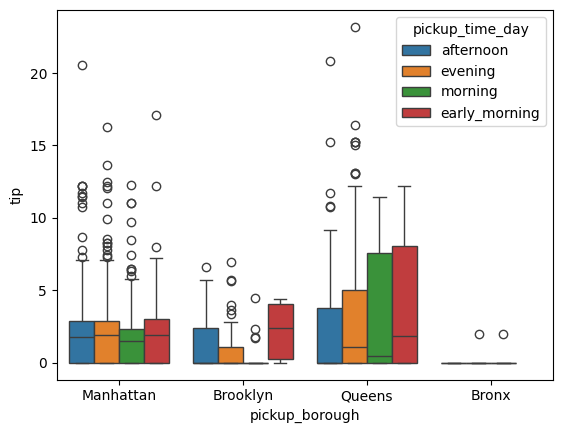

In [74]:
sns.boxplot(data=df, y='tip', x='pickup_borough', hue='pickup_time_day')

# Observations: 
# Queens tips the most, especially in the early morning time.
# It is definitely worth being in Queens in the early morning and morning!
# Manhattan seems to tip the same, regardless of the time.


# Context: 
# Queens is quite a large area and is quite widespread. Also,
# JFK airport is humongous (top 20 busiest airports) source below:

[*Source: Top 20 busiest airports claim*](https://en.wikipedia.org/wiki/List_of_busiest_airports_by_passenger_traffic)

<Axes: xlabel='pickup_borough', ylabel='distance'>

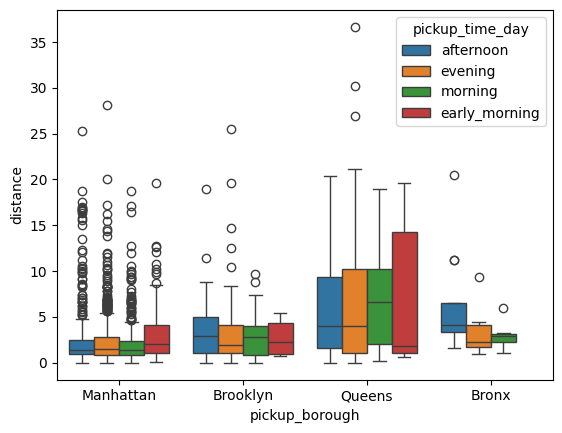

In [76]:
sns.boxplot(data=df, x='pickup_borough', y='distance', hue='pickup_time_day')

# Queens also gives us the most distance for trips. It's a big potential money-maker

pickup_borough
Manhattan    1653
Queens        207
Brooklyn      104
Bronx          25
Name: count, dtype: int64

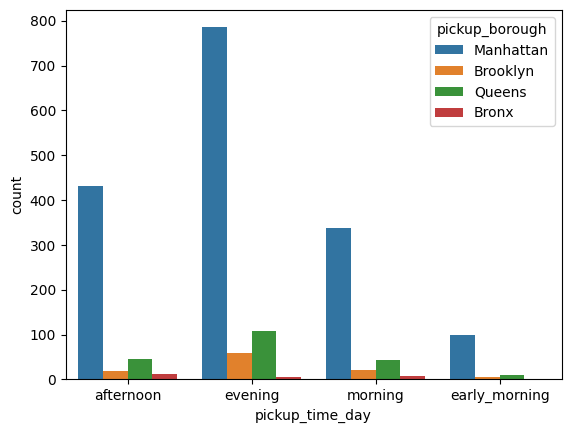

In [79]:
# A countplot to see how many pickups are needed for each time of day.
sns.countplot(df, x='pickup_time_day', hue='pickup_borough')

df['pickup_borough'].value_counts()

# Observation: 
# Manhattan has significantly more trips than Queens. For a taxi driver, I would likely have to 
# consider saturation points ( How many taxi drivers are in the area at the given times?)

---

# CONCLUSIONS


Here, we can see the following optimal places for each time of day if I were a taxi driver.
| Time of day        | Best tip locations   | Worst tip locations     | Busiest locations |
| -----------        | -----------          | -------------           | ---------         |
| Early Morning      | Queens, Brooklyn     | Bronx                   | Manhattan         | 
| Morning            | Queens               | Bronx, Brooklyn         | Manhattan |
| Afternoon          | Queens, Manhattan    | Bronx, Brooklyn         | Manhattan | 
| Evening            | Queens, Manhattan    | Bronx                   | Manhattan |


 If I were a taxi driver and was looking for the most money and the most tips. The best strategy from the data that we can conclude, is that the most overall consistent place to make money (assuming it isn't oversaturated with other taxis) is *Manhattan*

 The big tipping area is *Queens* and depending on the time of day, the runners up are *Brooklyn* and *Manhattan*.

 In the early morning, it is better to be at *Brooklyn* if *Queens* isn't working since they statistically tip a little better. 

 Also, if the payment is via cash for any passenger, they are far more likely not to tip.

### I would try this priority list to see how it would go. 

|Time of day | Priority 1 | Priority 2 | 
|-----------|---------|--------|
| Early-morning | Queens    | Manhattan |
| Morning       | Queens    | Manhattan | 
| Afternoon     | Manhattan | Queens |
| Evening       | Manhattan | Queens |

Justifications are based on consistency, tip, and distance balance. A lot more is lost if you don't get any passengers, so some fine-tuning and more information is needed (particularly how many taxis are in each time of day, area) in order to get a better picture. 